# Association Rule Mining on Iris Dataset

**IMT Atlantique – FIL A3 – UE Apprentissage Automatique**

> Adrien JALLAIS

## Environment set up

### Packages import

In [1]:
import pandas as pd

from matplotlib import pyplot as plt

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

### Data import

In [2]:
dataIni = pd.read_csv('iris.csv', sep=",", header=0, keep_default_na=False)

In [3]:
dataIni.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
dataIni.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Binary representation of the Iris data

Using the following discretization table, we can label our data.

In [5]:
data = dataIni.copy()
table_attribute = [
    {
        "name": "sepal_length",
        "range": [4.3, 5.55, 6.15, 7.9],
        "label": ["sl1", "sl2", "sl3"],
    },
    {
        "name": "sepal_width",
        "range": [2.0, 2.95, 3.35, 4.4],
        "label": ["sw1", "sw2", "sw3"],
    },
    {
        "name": "petal_length",
        "range": [1.0, 2.45, 4.75, 6.9],
        "label": ["pl1", "pl2", "pl3"],
    },
    {
        "name": "petal_width",
        "range": [0.1, 0.8, 1.75, 2.5],
        "label": ["pw1", "pw2", "pw3"],
    },
]

label = {"name": ["setosa", "versicolor", "virginica"], "value": ["c1", "c2", "c3"]}

for i in range(len(table_attribute)):
    attribute = table_attribute[i]
    data[attribute["name"]] = pd.cut(
        data[attribute["name"]], attribute["range"], labels=attribute["label"]
    )

data["species"] = data["species"].replace(label["name"], label["value"])

data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,sl1,sw3,pl1,pw1,c1
1,sl1,sw2,pl1,pw1,c1
2,sl1,sw2,pl1,pw1,c1
3,sl1,sw2,pl1,pw1,c1
4,sl1,sw3,pl1,pw1,c1


Then we can produce the associated transactions.

In [6]:
transactions = []

for index, row in data.iterrows():
    row_values = data.iloc[index].astype(str).values
    row_set = set(row_values)
    transactions.append(row_set)

transactions[:5]

[{'c1', 'pl1', 'pw1', 'sl1', 'sw3'},
 {'c1', 'pl1', 'pw1', 'sl1', 'sw2'},
 {'c1', 'pl1', 'pw1', 'sl1', 'sw2'},
 {'c1', 'pl1', 'pw1', 'sl1', 'sw2'},
 {'c1', 'pl1', 'pw1', 'sl1', 'sw3'}]

Then we produce a binary table

In [7]:
tb = TransactionEncoder()
tbf = tb.fit(transactions)
tba = tbf.transform(transactions)

Then we produce a dataframe from the above binary table

In [8]:
df = pd.DataFrame(tba, columns = tbf.columns_)
df.head()

,c1,c2,c3,nan,pl1,pl2,pl3,pw1,pw2,pw3,sl1,sl2,sl3,sw1,sw2,sw3
0,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False,True
1,True,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False
2,True,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False
3,True,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False
4,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False,True


## Generating all class-specific association rules 

Using the following parameters :

In [9]:
min_sup = 10 # minimum support
min_lift = 0.1 # minimum lift

We can find the frequest itemsets for each class, indicating the minimum support.

In [10]:
FI = apriori(df, min_support=(1/min_sup), use_colnames=True)
FI.head()

,support,itemsets
0,0.333333,(c1)
1,0.333333,(c2)
2,0.333333,(c3)
3,0.326667,(pl1)
4,0.300000,(pl2)


And generate the associated association rules, indicating the minimum lift.

In [11]:
AR = association_rules(FI, metric="lift", min_threshold=min_lift)
AR.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(c1),(pl1),0.333333,0.326667,0.326667,0.98,3.00000,0.217778,33.666667
1,(pl1),(c1),0.326667,0.333333,0.326667,1.00,3.00000,0.217778,inf
2,(c1),(pw1),0.333333,0.300000,0.300000,0.90,3.00000,0.200000,7.000000
3,(pw1),(c1),0.300000,0.333333,0.300000,1.00,3.00000,0.200000,inf
4,(c1),(sl1),0.333333,0.386667,0.306667,0.92,2.37931,0.177778,7.666667


As shown in the following table, we notice that all singular patterns are more regularly frequent.

In [12]:
AR.loc[:,['antecedents', 'consequents', 'confidence']]

,antecedents,consequents,confidence
0,(c1),(pl1),0.980000
1,(pl1),(c1),1.000000
2,(c1),(pw1),0.900000
3,(pw1),(c1),1.000000
4,(c1),(sl1),0.920000
...,...,...,...
633,(sl3),"(pl3, sw2, pw3, c3)",0.363636
634,(sw2),"(pl3, sl3, pw3, c3)",0.357143
635,(c3),"(sl3, sw2, pw3, pl3)",0.400000
636,(pw3),"(pl3, sl3, sw2, c3)",0.434783


### Filtering data

For the following steps of our work, we will work only with the row of which consequents leads to one of our Iris classes, in order to extract more robust interpretations.

In [13]:
AR["nb_antecedents"] = AR["antecedents"].str.len()
AR["nb_consequents"] = AR["consequents"].str.len()
# AR_filtered = AR.loc[AR['nb_antecedents'] == 1]
AR_filtered = AR.loc[AR['nb_consequents'] == 1]
# AR_filtered = AR
AR_filtered.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,nb_antecedents,nb_consequents
0,(c1),(pl1),0.333333,0.326667,0.326667,0.98,3.00000,0.217778,33.666667,1,1
1,(pl1),(c1),0.326667,0.333333,0.326667,1.00,3.00000,0.217778,inf,1,1
2,(c1),(pw1),0.333333,0.300000,0.300000,0.90,3.00000,0.200000,7.000000,1,1
3,(pw1),(c1),0.300000,0.333333,0.300000,1.00,3.00000,0.200000,inf,1,1
4,(c1),(sl1),0.333333,0.386667,0.306667,0.92,2.37931,0.177778,7.666667,1,1


We will as well filter the `AR` table to keep only the rules that have a single consequent and that consequent is either `c1`, `c2` or `c3`.

We use `apply` method which is more elegant then `iterrows`.

In [14]:
def match_set(some_set, match_list):
    for element in some_set:
        if element in match_list:
            return True
    return False

In [15]:
match_list = ["c1", "c2", "c3"]
AR_filtered = AR_filtered[AR_filtered["consequents"].apply(lambda x: match_set(x, match_list))]

AR_filtered.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,nb_antecedents,nb_consequents
1,(pl1),(c1),0.326667,0.333333,0.326667,1.000000,3.000000,0.217778,inf,1,1
3,(pw1),(c1),0.300000,0.333333,0.300000,1.000000,3.000000,0.200000,inf,1,1
5,(sl1),(c1),0.386667,0.333333,0.306667,0.793103,2.379310,0.177778,3.222222,1,1
7,(sw2),(c1),0.373333,0.333333,0.113333,0.303571,0.910714,-0.011111,0.957265,1,1
9,(sw3),(c1),0.246667,0.333333,0.206667,0.837838,2.513514,0.124444,4.111111,1,1


We observe that we have selected an high percentage of the rows.

In [16]:
print(len(AR))
print(len(AR_filtered))

638
56


## Plotting the rules

We create a column `color` according the `consequents` to ease the drawing of our plots, in which each class will be represented by a different color.

In [17]:
legend_dict = {'orange': 'c1 rules', 'black': 'c2 rules', 'cyan': 'c3 rules'}
legend_dict_keys = list(legend_dict.keys()) # to order legend

def colorize(ls):
    if "c1" in ls:
        return legend_dict_keys[0]
    elif "c2" in ls:
        return legend_dict_keys[1]
    elif "c3" in ls:
        return legend_dict_keys[2]
    
colors = []

for consequent in AR_filtered['consequents']:
    color = colorize(consequent)
    colors.append(color)

AR_filtered["color"] = colors
AR_filtered.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,nb_antecedents,nb_consequents,color
1,(pl1),(c1),0.326667,0.333333,0.326667,1.000000,3.000000,0.217778,inf,1,1,orange
3,(pw1),(c1),0.300000,0.333333,0.300000,1.000000,3.000000,0.200000,inf,1,1,orange
5,(sl1),(c1),0.386667,0.333333,0.306667,0.793103,2.379310,0.177778,3.222222,1,1,orange
7,(sw2),(c1),0.373333,0.333333,0.113333,0.303571,0.910714,-0.011111,0.957265,1,1,orange
9,(sw3),(c1),0.246667,0.333333,0.206667,0.837838,2.513514,0.124444,4.111111,1,1,orange


###  Lift versus conviction

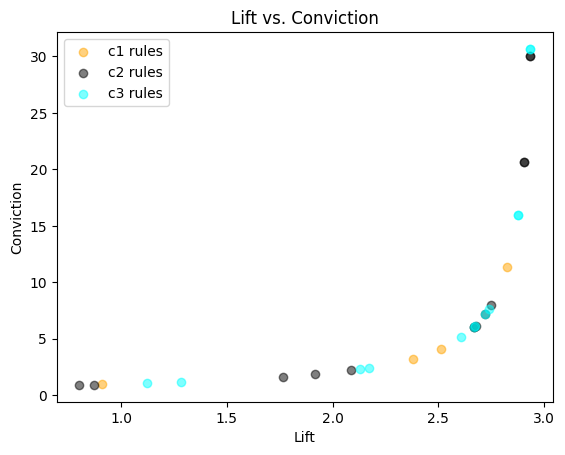

In [18]:
fig_l_c, ax = plt.subplots()

for color in legend_dict_keys:
    df = AR_filtered[AR_filtered["color"] == color]
    ax.scatter(df["lift"], df["conviction"], c=color, alpha=0.5, label=legend_dict[color])

ax.set_xlabel("Lift")
ax.set_ylabel("Conviction")
ax.legend(loc='upper left')
plt.title("Lift vs. Conviction")

plt.show()

###   Support versus confidence

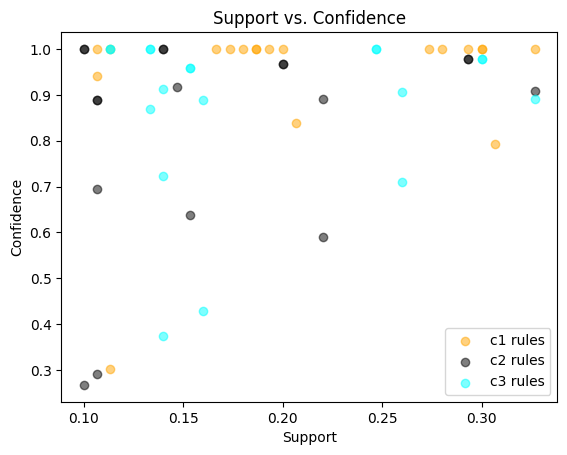

In [19]:
fig_s_c, ax = plt.subplots()

for color in legend_dict_keys:
    df = AR_filtered[AR_filtered["color"] == color]
    ax.scatter(df["support"], df["confidence"], c=color, alpha=0.5, label=legend_dict[color])

ax.set_xlabel("Support")
ax.set_ylabel("Confidence")
ax.legend(loc='lower right')
plt.title("Support vs. Confidence")

plt.show()

## Selection of the most specific rules

We will select the most specific rule with the highest relative support and then confidence for each class, thus we will order accordingly those parameters our dataframe. Indeed, 

As we want to select the best rules, we will start by ordering our iteration according the `nb_antecendents` column. Indeed the larger the length of their antecendents, the most specific the rule is considered.

Then, we will order by the `support` column and then the `confidence` column.
We will order firstly with the `support` column because we think it is more important than the `confidence` one. Indeed, the higher the support, the more important or frequent the rule is considered.

In [20]:
AR_sorted = AR_filtered.sort_values(by=['nb_antecedents', 'support', 'confidence'], ascending=False)

In [21]:
AR_sorted.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,nb_antecedents,nb_consequents,color
551,"(pw1, sl1, sw3, pl1)",(c1),0.166667,0.333333,0.166667,1.0,3.0,0.111111,inf,4,1,orange
610,"(sl3, sw2, pw3, pl3)",(c3),0.133333,0.333333,0.133333,1.0,3.0,0.088889,inf,4,1,cyan
578,"(pl2, pw2, sl2, sw1)",(c2),0.100000,0.333333,0.100000,1.0,3.0,0.066667,inf,4,1,black
313,"(pw1, sl1, pl1)",(c1),0.273333,0.333333,0.273333,1.0,3.0,0.182222,inf,3,1,orange
436,"(sl3, pw3, pl3)",(c3),0.246667,0.333333,0.246667,1.0,3.0,0.164444,inf,3,1,cyan


In [22]:
AR_sorted.tail()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,nb_antecedents,nb_consequents,color
15,(sl2),(c2),0.240000,0.333333,0.153333,0.638889,1.916667,0.073333,1.846154,1,1,black
28,(sw1),(c3),0.373333,0.333333,0.140000,0.375000,1.125000,0.015556,1.066667,1,1,cyan
7,(sw2),(c1),0.373333,0.333333,0.113333,0.303571,0.910714,-0.011111,0.957265,1,1,orange
17,(sl3),(c2),0.366667,0.333333,0.106667,0.290909,0.872727,-0.015556,0.940171,1,1,black
21,(sw2),(c2),0.373333,0.333333,0.100000,0.267857,0.803571,-0.024444,0.910569,1,1,black


We will not plot those with the highest conviction and then lift as some values (the ones with a conviction of `inf`, such as the following item) can not be displayed on the plot.

In [23]:
AR_sorted[:1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,nb_antecedents,nb_consequents,color
551,"(pw1, sl1, sw3, pl1)",(c1),0.166667,0.333333,0.166667,1.0,3.0,0.111111,inf,4,1,orange


###   Support versus confidence

We will select the best rules for each Iris classes.

In [24]:
match_list = ["c1", "c2", "c3"]
best_rules = {"c1": None, "c2": None, "c3": None}

for match in match_list:
    # splitting rules
    rules = AR_sorted[AR_sorted["consequents"].apply(lambda x: match_set(x, [match]))]
    
    if not rules.empty:
        # best rules selection
        best_rules[match] = rules.iloc[0]

Then we will highlight the above rules in the plot.

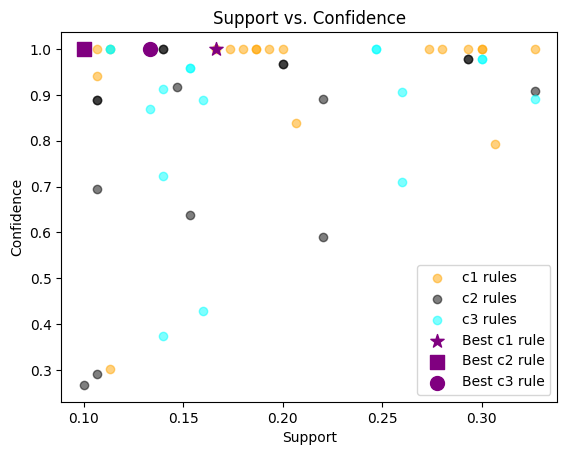

In [25]:
fig_s_c_2, ax = plt.subplots()

for color in legend_dict_keys:
    df = AR_filtered[AR_filtered["color"] == color]
    ax.scatter(df["support"], df["confidence"], c=color, alpha=0.5, label=legend_dict[color])

# highliting the points associated to the selected rules
markers = ['*', 's', 'o']
for i, match in enumerate(match_list):
    ax.scatter(best_rules[match]["support"], best_rules[match]["confidence"], c="purple", s=100, marker=markers[i%3], label=f"Best {match} rule")
    
ax.set_xlabel("Support")
ax.set_ylabel("Confidence")
ax.legend(loc='lower right')
plt.title("Support vs. Confidence")

plt.show()

## The best rule for each class

According what have been ordered and extracted before, the best rules upon support and confidence are the following : 

In [26]:
print('For the Iris-setosa, it is :')
best_rules_c1 = pd.DataFrame(best_rules['c1']).transpose()
best_rules_c1

For the Iris-setosa, it is :


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,nb_antecedents,nb_consequents,color
551,"(pw1, sl1, sw3, pl1)",(c1),0.166667,0.333333,0.166667,1.0,3.0,0.111111,inf,4,1,orange


In [27]:
print('For the Iris-versicolor, it is :')
best_rules_c2 = pd.DataFrame(best_rules['c2']).transpose()
best_rules_c2

For the Iris-versicolor, it is :


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,nb_antecedents,nb_consequents,color
578,"(pl2, pw2, sl2, sw1)",(c2),0.1,0.333333,0.1,1.0,3.0,0.066667,inf,4,1,black


In [28]:
print('For the Iris-virginica, it is :')
best_rules_c3 = pd.DataFrame(best_rules['c3']).transpose()
best_rules_c3

For the Iris-virginica, it is :


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,nb_antecedents,nb_consequents,color
610,"(sl3, sw2, pw3, pl3)",(c3),0.133333,0.333333,0.133333,1.0,3.0,0.088889,inf,4,1,cyan
